In [1]:
import keras
import numpy as np

Using TensorFlow backend.


In [2]:
model_path = 'models/model'
model = keras.models.load_model(model_path)

In [4]:
from data_loader import Data
data = Data()

In [5]:
model.evaluate(x=data.test.features, y=data.test.vasopressin.reshape(-1, data.maxlen, 1))

409/409 [==============================] - 5s 12ms/step


0.1554699239200368

In [6]:
preds = model.predict(data.test.features[:100])

In [9]:
import matplotlib.pyplot as plt
plt.style.use([{
    "figure.figsize":(12,9),
    "xtick.labelsize": "large",
    "ytick.labelsize": "large",
    "legend.fontsize": "x-large",
    "axes.labelsize": "x-large",
    "axes.titlesize": "xx-large",
    "axes.spines.top": False,
    "axes.spines.right": False,
},'seaborn'])

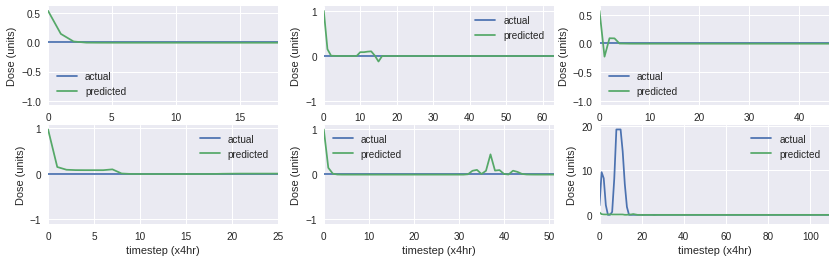

In [14]:
f, ax = plt.subplots(2, 3, figsize=(14, 4))

for n, i in enumerate(range(6)):
    d = data.vasopressin[i]
    x = range(len(d))
    ax = plt.subplot(2, 3, n + 1)
    ax.plot(d, label='actual')
    ax.plot(preds[i][:len(d)], label='predicted')
    ax.set_xlabel('timestep (x4hr)')
    ax.set_ylabel('Dose (units)')
    plt.xlim([0, np.array(np.where(d==-1)).min() -6])
    ax.legend()

f.savefig('figures/predicted_vasopressin.png', dpi=200, )